In [1]:
from sklearn.manifold import TSNE
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import gensim
import warnings
from gensim.models import Word2Vec
import pickle

warnings.simplefilter(action = 'ignore', category = FutureWarning)

In [2]:
dataset = pd.read_csv("News_dataset_preprocessed.csv")
articles = [w for w in dataset["text"]]
tokenized_words = [gensim.utils.simple_preprocess(str(w)) for w in articles]

In [3]:
# CBOW model
CBOW = gensim.models.Word2Vec(tokenized_words, min_count = 1,
                              vector_size = 100, window = 5)

In [4]:
# Skip-Gram model
Skip_Gram = gensim.models.Word2Vec(tokenized_words, min_count = 1,
                                   vector_size = 100, window = 5, sg = 1)

In [5]:
# 10 most similar words to "democrat" - CBOW
print(CBOW.wv.most_similar('democrat'))

[('democrats', 0.8621644973754883), ('republican', 0.666800856590271), ('republicans', 0.6590445041656494), ('democratic', 0.6473080515861511), ('conservative', 0.5440053939819336), ('linefeatured', 0.5286462903022766), ('obstructionist', 0.523735761642456), ('dems', 0.5228456258773804), ('declaredstill', 0.5209600329399109), ('gop', 0.5200924277305603)]


In [6]:
# 10 most similar words to "democrat" - Skip-Gram
print(Skip_Gram.wv.most_similar('democrat'))

[('democrats', 0.8953596949577332), ('republican', 0.8133105635643005), ('democratic', 0.7941856980323792), ('republicans', 0.7927691340446472), ('ossoffs', 0.7522175312042236), ('soundly', 0.7427015900611877), ('moderates', 0.724407970905304), ('heye', 0.7220386862754822), ('yarmuth', 0.7210153937339783), ('obstructionists', 0.7136785387992859)]


In [7]:
print("Similarity between the words 'democrat' " +
"and 'republican' - Word2vec CBOW: ",
CBOW.wv.similarity('democrat', 'republican'))

Similarity between the words 'democrat' and 'republican' - Word2vec CBOW:  0.66680086


In [8]:
print("Similarity between the words 'democrat' " +
"and 'republican' - Word2vec Skip-Gram: ",
Skip_Gram.wv.similarity('democrat', 'republican'))

Similarity between the words 'democrat' and 'republican' - Word2vec Skip-Gram:  0.8133106


In [9]:
# word vector for "democrat" - CBOW
CBOW.wv["democrat"]

array([-0.15486453, -0.38460302,  1.8679408 , -2.8357308 ,  3.7502003 ,
        2.7459855 , -4.476205  , -0.03413179, -0.4603789 ,  3.067975  ,
       -1.031128  , -0.24315529, -1.9587184 , -0.83787423, -0.7705464 ,
        4.633648  ,  0.4248568 , -1.1194421 , -2.4806812 , -0.63035685,
        1.2121533 , -0.33474997, -0.9804265 , -1.8345715 , -0.5227952 ,
       -0.05296422, -0.76315343, -0.52639294,  1.0487221 , -0.7206268 ,
        2.1833334 ,  0.58291787,  0.31174186,  1.0293046 , -0.08932241,
       -0.21406314,  4.037024  ,  0.7538958 ,  0.9374343 , -0.8139641 ,
       -0.43364355,  2.2505624 , -0.40967202, -0.5216    ,  1.3277186 ,
        0.92502147, -1.410446  ,  1.5566828 ,  1.944694  , -1.3863142 ,
       -1.8533778 , -1.108798  , -0.9807134 , -0.2010756 , -0.6623756 ,
       -1.1287136 ,  0.29813176, -1.3301713 , -1.4987911 ,  0.03226261,
       -3.037263  ,  0.2157974 , -0.38291794, -0.42366222, -2.7127624 ,
       -0.22281128, -2.722236  ,  3.4026012 ,  3.9548652 , -1.39

In [10]:
# word vector for "republican" - Skip-Gram
Skip_Gram.wv["republican"]

array([-0.15687688,  0.57775664,  0.22465038,  0.10849552,  0.8767462 ,
        0.06001193,  0.24950927,  0.7490596 , -0.4603716 , -0.0683419 ,
       -0.05888481, -0.3830066 , -0.40921244, -0.09389482, -0.02829758,
        0.29799777, -0.10325564, -0.2658272 , -0.3480416 , -0.45140955,
        0.51426005, -0.00382523,  0.10747739, -0.35553327, -0.0787117 ,
        0.44369113, -0.6394697 , -0.28822815, -0.02720544, -0.00948635,
        0.45445603, -0.17314638,  0.2971874 ,  0.04305561, -0.01038526,
        0.23896618,  0.48585695,  0.27422893, -0.53601056, -0.35013157,
        0.19617698, -0.24003908,  0.50742114,  0.21919774,  0.72702426,
       -0.2117317 , -0.2532529 , -0.09173961,  0.3279936 , -0.16978727,
        0.37834957, -0.32201585,  0.10843635,  0.38356552, -0.16967393,
       -0.5268295 ,  0.75733674,  0.10430429, -0.27938905, -0.30380484,
       -0.25222558,  0.26555377, -0.16741733,  0.68543375, -0.5190494 ,
       -0.33832273, -0.15179424,  0.49182972, -0.07308806,  0.79

In [11]:
def display_closestwords_tsnescatterplot(model, modelName, word, size):
    
    arr = np.empty((0, size), dtype = 'f')
    word_labels = [word]

    close_words = model.similar_by_word(word)
    
    arr = np.append(arr, np.array([model[word]]), axis = 0)
    for wrd_score in close_words:
        wrd_vector = model[wrd_score[0]]
        word_labels.append(wrd_score[0])
        arr = np.append(arr, np.array([wrd_vector]), axis = 0)
        
        tsne = TSNE(n_components = 2, random_state = 0, perplexity = 1.9)
        np.set_printoptions(suppress = True)
        Y = tsne.fit_transform(arr)
    
    x_coords = Y[:, 0]
    y_coords = Y[:, 1]
    plt.scatter(x_coords, y_coords)
    
    for label, x, y in zip(word_labels, x_coords, y_coords):
        plt.annotate(label, xy = (x, y), xytext = (0, 0), textcoords = 'offset points')
    plt.xlim(x_coords.min() + 0.00005, x_coords.max() + 0.00005)
    plt.ylim(y_coords.min() + 0.00005, y_coords.max() + 0.00005)
    plt.title("Top 10 closest words to 'democrat' - Word2vec " + modelName, pad = 20)
    plt.show()

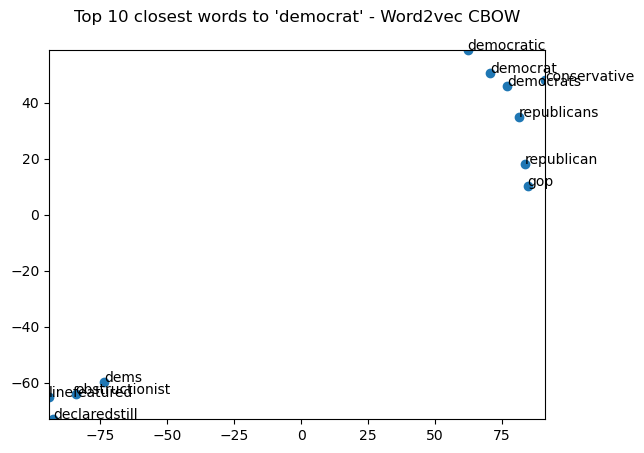

In [12]:
display_closestwords_tsnescatterplot(CBOW.wv, 'CBOW', 'democrat', 100)

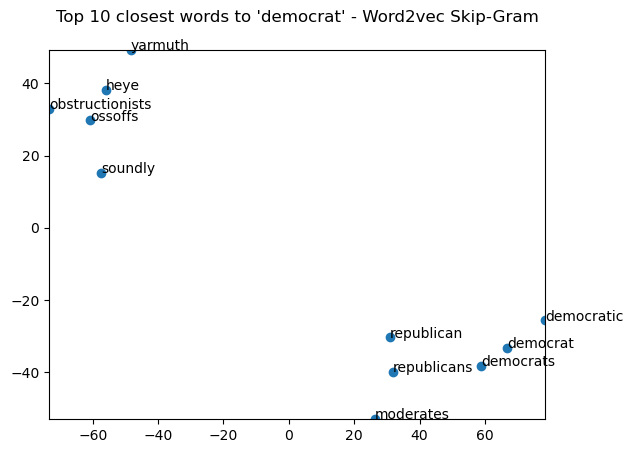

In [13]:
display_closestwords_tsnescatterplot(Skip_Gram.wv, 'Skip-Gram', 'democrat', 100)

In [14]:
def getWordVectorCBOW(doc):
    return [CBOW.wv[word] for word in doc if word in CBOW.wv.index_to_key]

In [15]:
word_vectors_CBOW = []
for i in range(len(tokenized_words)):
    word_vectors_CBOW.append(getWordVectorCBOW(tokenized_words[i]))

In [16]:
def getWordVectorSkipGram(doc):
    return [Skip_Gram.wv[word] for word in doc if word in Skip_Gram.wv.index_to_key]

In [17]:
word_vectors_Skip_Gram = []
for i in range(len(tokenized_words)):
    word_vectors_Skip_Gram.append(getWordVectorSkipGram(tokenized_words[i]))

In [18]:
# saving the vectors to disk
pickle_out = open("word2vec_cbow_vectors.pickle", "wb")
pickle.dump(word_vectors_CBOW, pickle_out)
pickle_out.close()

In [19]:
# saving the vectors to disk
pickle_out = open("word2vec_skip-gram_vectors.pickle", "wb")
pickle.dump(word_vectors_Skip_Gram, pickle_out)
pickle_out.close()